In [4]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
timeseries_df = pd.read_csv('../data/timeseries.csv')

In [8]:
beds = pd.read_csv('../data/beds.csv')

In [9]:
beds.head()

,state,country,bedspermille
0,AL,USA,3.1
1,AK,USA,2.2
2,AZ,USA,1.9
3,AR,USA,3.2
4,CA,USA,1.8


In [10]:
us_df = timeseries_df.loc[(timeseries_df['country'] == 'USA'), :]

In [11]:
us_df.loc[(timeseries_df['state'] == 'TX') & (timeseries_df['cases'] > 0), :]

,city,county,state,country,population,lat,long,url,cases,deaths,recovered,active,tested,growthFactor,date
2940,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,13.0,NaN,NaN,13.0,NaN,NaN,2020-03-10
2941,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,21.0,NaN,NaN,21.0,NaN,1.615385,2020-03-11
2942,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,27.0,NaN,NaN,27.0,NaN,1.285714,2020-03-12
2943,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,39.0,NaN,NaN,39.0,NaN,1.444444,2020-03-13
2944,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,51.0,NaN,NaN,51.0,NaN,1.307692,2020-03-14
2945,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,56.0,NaN,NaN,56.0,NaN,1.098039,2020-03-15
2946,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,55.0,NaN,NaN,55.0,NaN,0.982143,2020-03-16
2947,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,62.0,NaN,NaN,62.0,NaN,1.127273,2020-03-17
2948,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,82.0,NaN,NaN,82.0,NaN,1.322581,2020-03-18
2949,NaN,NaN,TX,USA,28995881.0,31.177528,-100.088471,https://covidtracking.com/api/states,143.0,3.0,NaN,140.0,2355.0,1.743902,2020-03-19


In [6]:
us_df['datetime'] = pd.to_datetime(us_df['date'])

# us_df.set_index(['datetime', 'state'], inplace=True)

/Users/trae/.virtualenvs/redzone/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
print(us_df.shape)
us_last_df = us_df.sort_values('datetime').groupby(['state', 'county']).last().reset_index()
print(us_last_df.shape)

(7518, 16)
(1292, 16)


In [63]:
us_last_df.head()

,state,county,city,country,population,lat,long,url,cases,deaths,recovered,active,tested,growthFactor,date,datetime
0,AK,Anchorage Economic Region,NaN,USA,294356.0,61.108910,-149.362950,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,17.0,0.0,0.0,17.0,NaN,NaN,2020-03-23,2020-03-23
1,AK,Gulf Coast Economic Region,NaN,USA,80866.0,59.491968,-148.903015,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,3.0,0.0,0.0,3.0,NaN,NaN,2020-03-23,2020-03-23
2,AK,Interior Economic Region,NaN,USA,109847.0,65.204163,-151.024977,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,7.0,0.0,0.0,7.0,NaN,NaN,2020-03-23,2020-03-23
3,AK,Mat-Su Economic Region,NaN,USA,107610.0,62.337477,-149.715168,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,2.0,0.0,0.0,2.0,NaN,NaN,2020-03-23,2020-03-23
4,AK,Southeast Economic Region,NaN,USA,72373.0,57.598405,-136.934731,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,7.0,0.0,0.0,7.0,NaN,NaN,2020-03-23,2020-03-23


In [64]:
us_last_df.loc[:, ['cases', 'deaths', 'recovered', 'active']] = us_last_df.loc[:, ['cases', 'deaths', 'recovered', 'active']].fillna(0)

In [65]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    t = None
    
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [66]:
def sir(start_date, end_date, pop_dict, beta, gamma):
    # Initial conditions vector
    # print(pop_dict['total'], pop_dict['infected'], pop_dict['recovered'], pop_dict['deaths'])
    
    susceptible = pop_dict['total'] - pop_dict['infected'] - pop_dict['recovered'] - pop_dict['deaths']
    
    y0 = susceptible, pop_dict['infected'], pop_dict['recovered']
    
    delta = end_date - start_date
    
    print(delta)
    
    t = np.linspace(0, delta.days, delta.days )
    
    # print(y0, t, beta, gamma)
    ret = odeint(deriv, y0, t, args=(pop_dict['total'], beta, gamma))
    
    return ret.T

In [73]:
end_date = datetime(2020, 12, 31)
beta = 0.2
gamma = 1./10

def run_row(row):

    pop_dict = {
        'total': row['population'],
        'infected': row['active'],
        'recovered': row['recovered'],
        'deaths': row['deaths']
    }
    
    # print(row)
    
    (S, I, R) = sir(row['datetime'], end_date, pop_dict, beta, gamma)
    
    dates = pd.date_range(start=row['datetime'], end=(end_date - timedelta(1)), freq='D').to_list()
    
    state = [row['state']] * len(S)
    county = [row['county']] * len(S)
    
    sir_df = pd.DataFrame(zip(state, county, S, I, R), columns=['state', 'county', 'susceptible', 'infected', 'recovered'], index=dates)
    
    return sir_df

In [74]:
df_list = us_last_df.apply(run_row, axis=1)

283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 00:00:00
283 days 0

In [69]:
len(df_list)

1292

In [79]:
df_list[0].head()

,susceptible,infected,recovered
date,,,
2020-03-23,294339.000000,17.000000,0.000000
2020-03-24,294335.411113,18.794329,1.794558
2020-03-25,294331.443480,20.777993,3.778527
2020-03-26,294327.057148,22.970960,5.971892
2020-03-27,294322.207955,25.395298,8.396747


<Figure size 1080x576 with 0 Axes>

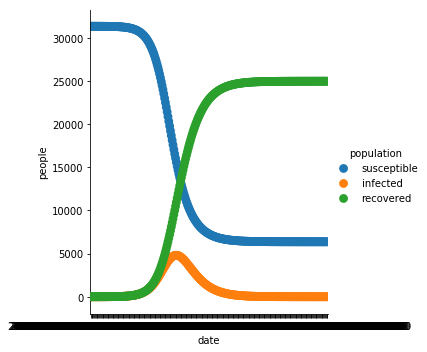

In [80]:
def plot_sir(df):
    df.index.name = 'date'
    df.drop(['state', 'county'], axis=1, inplace=True)

    df = df.reset_index().melt('date', var_name='population', value_name='people')
        
    sir_plot = sns.factorplot(x='date', y='people', hue='population', data=df)
    
    return sir_plot

plt.figure(figsize=(15,8))

plot_sir(df_list[10])

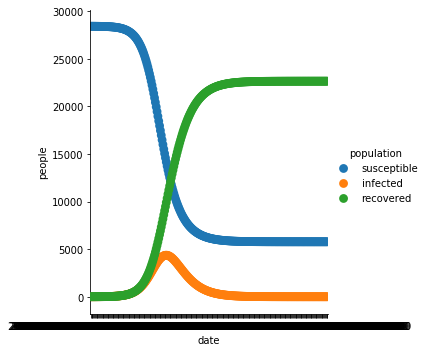

In [81]:
plot_sir(df_list[183])